### Import Library

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [100]:
dataset = pd.read_csv('dataset/dataset_normalized.csv')
dataset

,indeks_pembangunan_manusia,angka_harapan_hidup,rerata_lama_sekolah,harapan_lama_sekolah,pengeluaran_per_kapita
0,0.705505,0.513774,0.745590,0.781568,0.205505
1,0.735800,0.599370,0.658957,0.785757,0.283075
2,0.711040,0.482487,0.673461,0.806703,0.252654
3,0.749053,0.633609,0.772246,0.780969,0.245945
4,0.723857,0.650138,0.646021,0.709156,0.285924
...,...,...,...,...,...
6269,0.287649,0.376820,0.141121,0.271694,0.028951
6270,0.274541,0.471861,0.087417,0.239378,0.036855
6271,0.201282,0.484652,0.036064,0.096948,0.070677
6272,0.405768,0.454939,0.243826,0.396768,0.071458


In [101]:
X = dataset.drop(columns='indeks_pembangunan_manusia').values
X

array([[0.5137741 , 0.74558996, 0.78156792, 0.20550526],
       [0.59937033, 0.65895727, 0.78575703, 0.28307523],
       [0.48248721, 0.67346139, 0.80670257, 0.25265383],
       ...,
       [0.48465171, 0.03606429, 0.09694794, 0.0706769 ],
       [0.454939  , 0.24382595, 0.3967684 , 0.07145811],
       [0.67827627, 0.81575853, 0.7432675 , 0.49119985]])

In [102]:
y = dataset['indeks_pembangunan_manusia'].values
y

array([0.70550539, 0.73579959, 0.71103991, ..., 0.20128168, 0.40576755,
       0.8311972 ])

### Split Data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

##### Inisialisasi bobot dan bias

In [104]:
def inisialisasi(hidden_layer, hidden_neuron):
    bobot = []
    bias = []
    for i in range(hidden_layer):
        if i == 0:
            bobot.append(np.random.rand(4, hidden_neuron[i]).tolist())
        else:
            bobot.append(np.random.rand(hidden_neuron[i-1], hidden_neuron[i]).tolist())
        bias.append(np.random.rand(hidden_neuron[i]).tolist())
    bobot_output = np.random.rand(hidden_neuron[-1]).tolist()
    bias_output = np.random.rand()
    return bobot, bias, bobot_output, bias_output

##### Fungsi aktivasi

In [105]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

def turunan_relu(x):
    if x > 0:
        return 1
    else:
        return 0 

##### Training

In [106]:
def ann(epochs, hidden_layer, hidden_neuron, lr, target_error, X_train, y_train):
    bobot, bias, bobot_output, bias_output = inisialisasi(hidden_layer, hidden_neuron)
    temp_mse = []
    temp_epoch = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_train)):
            # FEEDFORWARD
            # Operasi pada Hidden Layer
            # penjumlahan terbobot dan aktivasi
            aktivasi_hidden = [] # menampung keseluruhan aktivasi
            for j in range(hidden_layer):
                aktivasi_hidden_temp = [] # menampung aktivasi setiap hiden layer (sementara)
                for k in range(hidden_neuron[j]):
                    sumXbobot = 0 # hasil penjumlahan terbobot
                    if j == 0: # untuk hidden neuron pertama (karena neuron input tidak terdefinisi)
                        for l in range(4): # jumlah neuron layer sebelumnya/ neuron input = 4
                            sumXbobot += bobot[j][l][k] * X_train[i][l]
                    else:
                        for l in range(hidden_neuron[j-1]): # jumlah neuron layer sebelumnya
                            sumXbobot += bobot[j][l][k] * aktivasi_hidden[j-1][l]
                    # menambahkan bias pada hasil penjumlahan terbobot
                    sumXbobotbias = bias[j][k] + sumXbobot
                    # aktivasi
                    aktivasi_hidden_temp.append(relu(sumXbobotbias))
                # menambahkan hasil aktivasi tiap hidden_layer ke penampung keseluruhan
                aktivasi_hidden.append(aktivasi_hidden_temp)

            # Operasi pada Output Layer
            # perkalian
            sumZbobotoutput = 0 # hasil penjumlahan terbobot di output layer
            for j in range(hidden_neuron[-1]):
                sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
            # menambahkan bias pada hasil penjumlahan terbobot di output layer
            sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
            # aktivasi
            prediksi = relu(sumZbobotoutput_biasoutput)

            # Hitung Error (total error untuk menghitung MSE)
            error = y_train[i] - prediksi
            total_error += (error ** 2)

        # BACKPROPAGATION
        # error output layer
        error_output = error * turunan_relu(prediksi)
        # inisialisasi error setiap neuron di hidden layer
        error_nuron_hidden = []
        for i in range(hidden_layer):
            error_nuron_hidden.append(np.zeros(hidden_neuron[i]).tolist())
        # error setiap neuron di hidden layer
        for i in range(hidden_layer):
            for j in range(hidden_neuron[-(i+1)]): # mulai dari hidden layer terakhir
                if i == 0: # hidden terakhir akan melibatkan error output
                    sumErrorBobotSetelah = 0
                    sumErrorBobotSetelah += error_output * bobot_output[j]
                    # sum dikalikan turunan input
                    error_nuron_hidden[-(i+1)][j] = sumErrorBobotSetelah * turunan_relu(aktivasi_hidden[-(i+1)][j]) 
                else:
                    sumErrorBobotSetelah = 0
                    for k in range(hidden_neuron[-(i)]): # hidden layer yang 1 lebihnya
                        sumErrorBobotSetelah += error_nuron_hidden[-(i+1)][j] * bobot[-(i)][j][k]
                        # sum dikalikan turunan input
                        error_nuron_hidden[-(i+1)][j] = sumErrorBobotSetelah * turunan_relu(aktivasi_hidden[-(i+1)][j]) 
        # memperbaiki bobot dan bias
        for i in range(len(X_train)):
            for j in range(hidden_layer):
                for k in range(hidden_neuron[j]):
                    # memperbaiki bobot
                    if j == 0:
                        for l in range(4):
                            bobot[j][l][k] += lr * error_nuron_hidden[j][k] * X_train[i][l]
                    else:
                        for l in range(hidden_neuron[j-1]):
                            bobot[j][l][k] += lr * error_nuron_hidden[j][k] * aktivasi_hidden[j-1][l]
                # memperbaiki bias
                bias[j][k] += lr * error_nuron_hidden[j][k]
        # memperbaiki bobot output
        for i in range(len(bobot_output)):
            bobot_output[i] += lr * error_output * aktivasi_hidden[-1][i]
        # memperbaiki bias output
        bias_output += lr * error_output

        # RATA-RATA ERROR
        mse = total_error / len(X_train)
        if mse <= target_error:
            print(f"\n\nTraining dihentikan pada epoch {epoch} dengan MSE: {mse}")
            break
        else:
            print(f"Epoch {epoch + 1}, MSE: {mse}")
        epoch_sekarang = epoch + 1
        temp_mse.append(mse)
        temp_epoch.append(epoch_sekarang)
        
    print("\nPELATIHAN SELESAI.")
    return temp_epoch, temp_mse

In [107]:
hidden_layer = 2
hidden_neuron = [2, 2]
lr = 0.005
epoch = 100
target_error = 0

temp_epoch, temp_mse = ann(epoch, hidden_layer, hidden_neuron, lr, target_error, X_train, y_train)

Epoch 1, MSE: 8.322153440343667
Epoch 2, MSE: 0.013023623730372209
Epoch 3, MSE: 0.01297781629650356
Epoch 4, MSE: 0.012932665986162243
Epoch 5, MSE: 0.012888165243569158
Epoch 6, MSE: 0.012844306593319133
Epoch 7, MSE: 0.012801082639553645
Epoch 8, MSE: 0.012758486065143246
Epoch 9, MSE: 0.01271650963087665
Epoch 10, MSE: 0.012675146174659384
Epoch 11, MSE: 0.012634388610719955
Epoch 12, MSE: 0.012594229928823647
Epoch 13, MSE: 0.012554663193495434
Epoch 14, MSE: 0.012515681543249859
Epoch 15, MSE: 0.012477278189828573
Epoch 16, MSE: 0.012439446417446532
Epoch 17, MSE: 0.0124021795820449
Epoch 18, MSE: 0.012365471110551958
Epoch 19, MSE: 0.012329314500151721
Epoch 20, MSE: 0.012293703317559263
Epoch 21, MSE: 0.012258631198304178
Epoch 22, MSE: 0.012224091846020666
Epoch 23, MSE: 0.01219007903174526
Epoch 24, MSE: 0.012156586593221505
Epoch 25, MSE: 0.012123608434211652
Epoch 26, MSE: 0.012091138523815298
Epoch 27, MSE: 0.012059170895795206
Epoch 28, MSE: 0.012027699647909538
Epoch 29,

##### Visualisasi mse tiap epoch

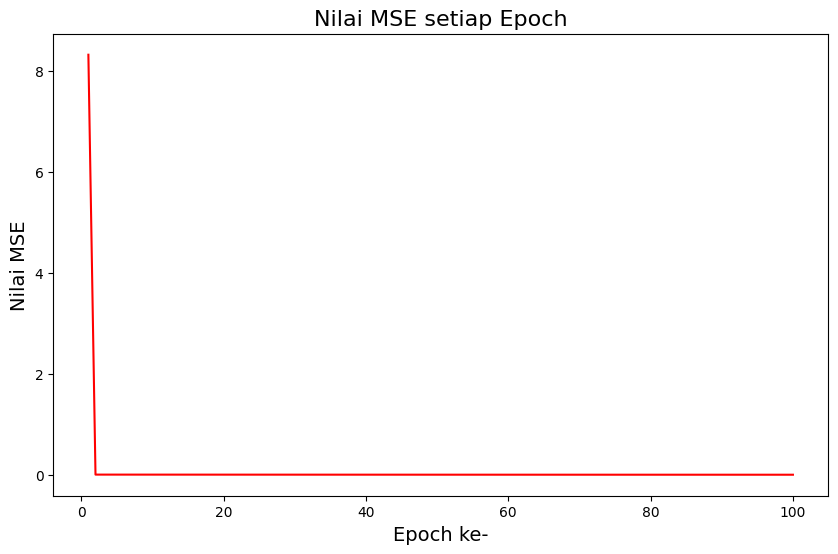

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(temp_epoch, temp_mse, color='r')
plt.title('Nilai MSE setiap Epoch', fontsize=16)
plt.xlabel('Epoch ke-', fontsize=14)
plt.ylabel('Nilai MSE', fontsize=14)

plt.show()

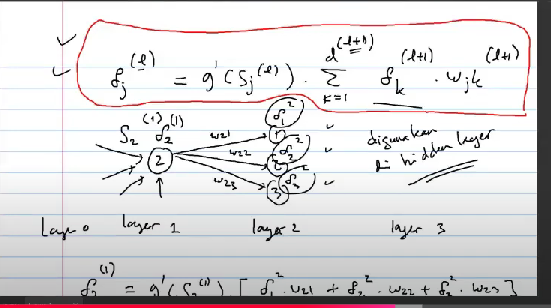

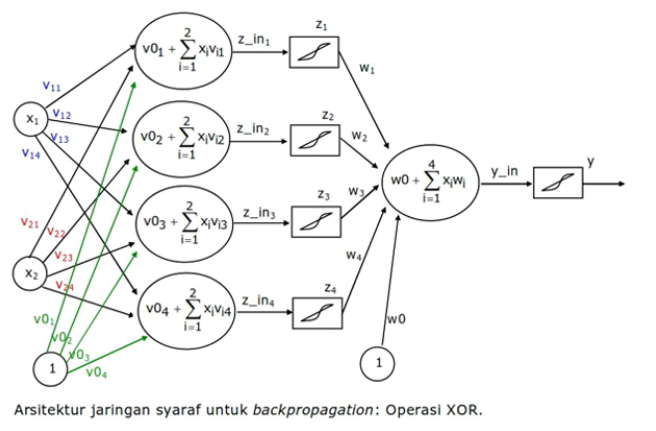